In [30]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib.inline #for jupyter notedbook
import pandas as pd
from scipy.stats import uniform
import seaborn as sns


In [2]:
food_consumption =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Second year first sem/DATA SCIENCE/W7 - Data Sets/food_consumption.csv")
food_consumption

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96
...,...,...,...,...,...
1425,1426,Bangladesh,dairy,21.91,31.21
1426,1427,Bangladesh,wheat,17.47,3.33
1427,1428,Bangladesh,rice,171.73,219.76
1428,1429,Bangladesh,soybeans,0.61,0.27


In [3]:
bs_consumption = food_consumption[food_consumption["country"] == "Belgium" ]
print(bs_consumption)
print(bs_consumption["consumption"].agg([np.mean,np.median]))

     Unnamed: 0  country food_category  consumption  co2_emission
396         397  Belgium          pork        38.65        136.80
397         398  Belgium       poultry        12.20         13.11
398         399  Belgium          beef        15.63        482.31
399         400  Belgium     lamb_goat         1.32         46.23
400         401  Belgium          fish        18.97         30.29
401         402  Belgium          eggs        12.59         11.57
402         403  Belgium         dairy       236.19        336.43
403         404  Belgium         wheat       111.91         21.34
404         405  Belgium          rice         8.61         11.02
405         406  Belgium      soybeans         0.07          0.03
406         407  Belgium          nuts         7.32         12.96
mean      42.132727
median    12.590000
Name: consumption, dtype: float64


In [4]:
usa_consumption = food_consumption[food_consumption["country"] == "USA" ]
print(usa_consumption)
print(usa_consumption["consumption"].agg([np.mean,np.median]))

    Unnamed: 0 country food_category  consumption  co2_emission
55          56     USA          pork        27.64         97.83
56          57     USA       poultry        50.01         53.72
57          58     USA          beef        36.24       1118.29
58          59     USA     lamb_goat         0.43         15.06
59          60     USA          fish        12.35         19.72
60          61     USA          eggs        14.58         13.39
61          62     USA         dairy       254.69        362.78
62          63     USA         wheat        80.43         15.34
63          64     USA          rice         6.88          8.80
64          65     USA      soybeans         0.04          0.02
65          66     USA          nuts         7.86         13.91
mean      44.65
median    14.58
Name: consumption, dtype: float64


In [5]:
#newDataframe = dataframe[ ( dataframe["column"]  == "row_Name" )   |   ( dataframe["column"]  == "row_Name" )  ]

In [6]:
usa_bs_consumption = food_consumption[(food_consumption["country"] == "USA")  |  (food_consumption[ "country"] == "Belgium")]
print(usa_bs_consumption)

     Unnamed: 0  country food_category  consumption  co2_emission
55           56      USA          pork        27.64         97.83
56           57      USA       poultry        50.01         53.72
57           58      USA          beef        36.24       1118.29
58           59      USA     lamb_goat         0.43         15.06
59           60      USA          fish        12.35         19.72
60           61      USA          eggs        14.58         13.39
61           62      USA         dairy       254.69        362.78
62           63      USA         wheat        80.43         15.34
63           64      USA          rice         6.88          8.80
64           65      USA      soybeans         0.04          0.02
65           66      USA          nuts         7.86         13.91
396         397  Belgium          pork        38.65        136.80
397         398  Belgium       poultry        12.20         13.11
398         399  Belgium          beef        15.63        482.31
399       

In [7]:
usa_bs_consumption["consumption"].agg([np.mean,np.median])

mean      43.391364
median    13.585000
Name: consumption, dtype: float64

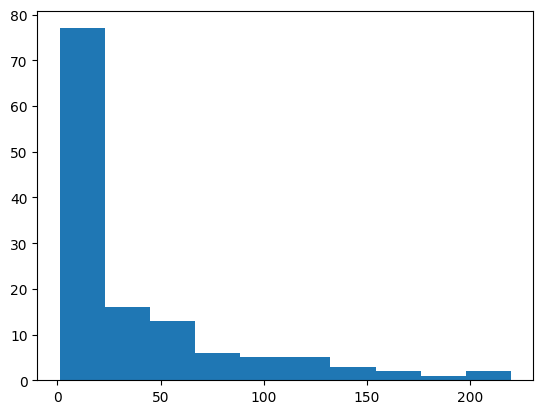

IT IS A RIGHT SKEWED


In [8]:
rice_consumption= food_consumption[food_consumption["food_category"] == "rice"]
plt.hist(rice_consumption ["co2_emission"])
plt.show()
print("IT IS A RIGHT SKEWED")

In [9]:
np.quantile(food_consumption["co2_emission"],np.linspace(0,1,4))

array([   0.        ,    8.05333333,   35.86666667, 1712.        ])

In [10]:
np.quantile(food_consumption["co2_emission"],np.linspace(0,1,6))

array([   0.   ,    3.54 ,   11.026,   25.59 ,   99.978, 1712.   ])

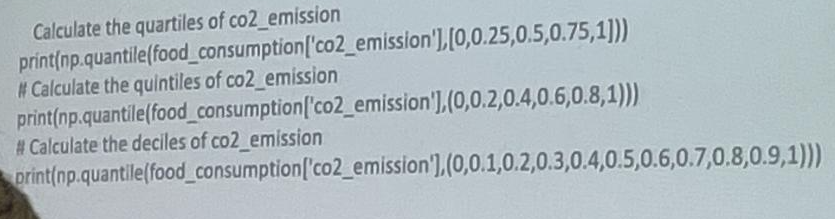

In [11]:
np.quantile(food_consumption["co2_emission"],np.linspace(0,1,11))

array([0.00000e+00, 6.68000e-01, 3.54000e+00, 7.04000e+00, 1.10260e+01,
       1.65300e+01, 2.55900e+01, 4.42710e+01, 9.99780e+01, 2.03629e+02,
       1.71200e+03])

In [12]:
print(food_consumption . groupby("food_category")["co2_emission"].agg([np.var,np.std]))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


<Axes: >

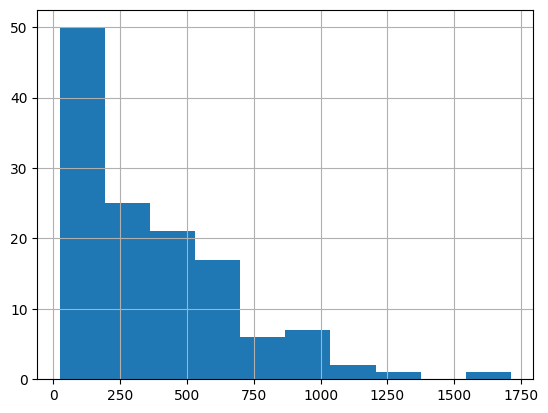

In [13]:
food_consumption[food_consumption["food_category"] == "beef"]["co2_emission"].hist()

<Axes: >

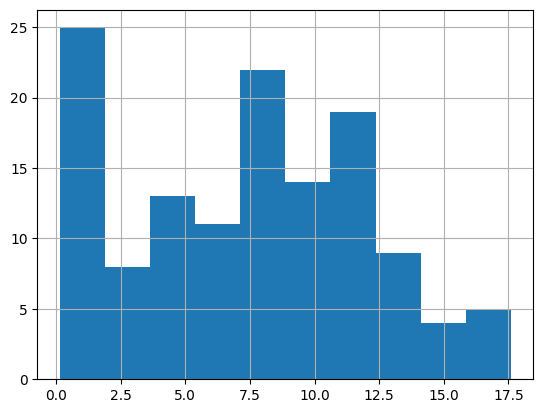

In [14]:
food_consumption[food_consumption["food_category"] == "eggs"]["co2_emission"].hist()

In [15]:
emission_by_country=food_consumption.groupby("country")["co2_emission"].sum()
q1=np.quantile(emission_by_country,0.25)
q3=np.quantile(emission_by_country,0.75)
iqr = q3-q1
lowerbound  =  q1-   1.5  * iqr
upperbound  =  q3+   1.5  * iqr
outliers= emission_by_country[(emission_by_country <  lowerbound) | (emission_by_country > upperbound)]
print(lowerbound,upperbound,outliers)

-550.0787500000001 2107.89125 country
Argentina    2172.4
Name: co2_emission, dtype: float64


In [16]:
amir_deals = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Second year first sem/DATA SCIENCE/W7 - Data Sets/amir_deals.csv')
# Count the deals for each product
counts = amir_deals['product'].value_counts()
# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


In [17]:
# Set random seed
np.random.seed(24)
# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)
# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11
     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


In [18]:

restaurant_groups= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Second year first sem/DATA SCIENCE/W7 - Data Sets/restaurant_groups.csv")
print(restaurant_groups)

   Unnamed: 0 group_id  group_size
0           0        A           2
1           1        B           4
2           2        C           6
3           3        D           2
4           4        E           2
5           5        F           2
6           6        G           3
7           7        H           2
8           8        I           4
9           9        J           2


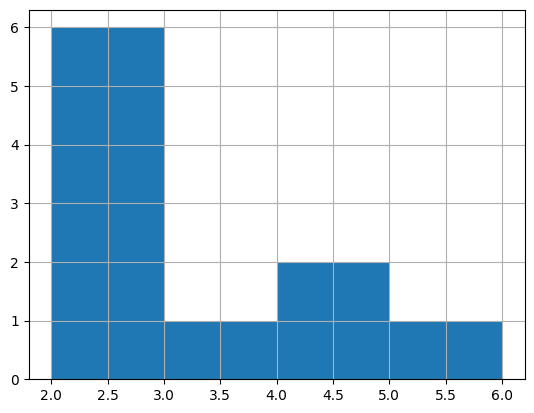

In [19]:
restaurant_groups["group_size"].hist(bins=[2,3,4,5,6])
plt.show()

In [20]:
size_dist=restaurant_groups["group_size"].value_counts() / restaurant_groups.shape[0]

size_dist=size_dist.reset_index()
size_dist.columns=['group_size','prob']
print(size_dist)

expected_value= np.sum(size_dist['group_size'] * size_dist["prob"])
print("the expected value is ", expected_value)

groups_4_or_more = size_dist[size_dist["group_size"] >= 4]

prob_4_or_more = np.sum(groups_4_or_more ['prob'])
print(prob_4_or_more)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1
the expected value is  2.9000000000000004
0.30000000000000004


In [21]:
minTime=0
maxTime=130
prob_greater_than_5 = 1- uniform.cdf(5,0,30)
print(prob_greater_than_5)




0.8333333333333334


In [22]:
prob_between_10_and_20 = uniform.cdf(20,0,30)-uniform.cdf(10,0,30)
print(prob_between_10_and_20)

0.3333333333333333


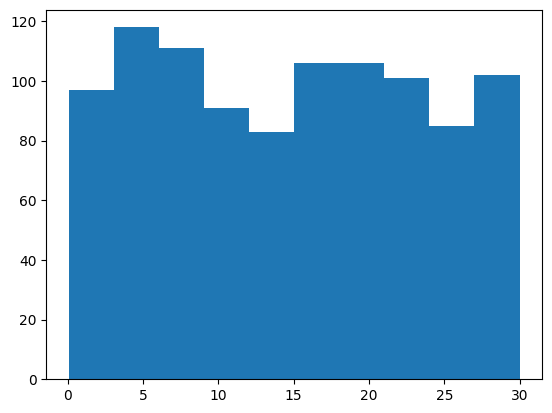

In [23]:

#simulating the graph
# Set random seed to 334
np.random.seed(334)
# Import uniform
from scipy.stats import uniform
# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)
# Create a histogram of simulated times and show  plot
plt.hist(wait_times)
plt.show()


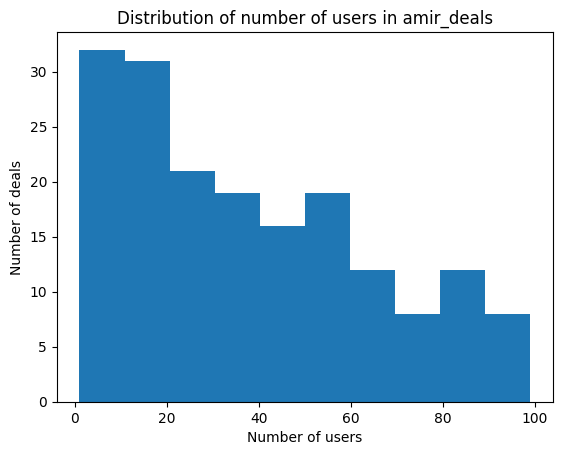

In [24]:
plt.hist(amir_deals["num_users"])
plt.xlabel("Number of users")
plt.ylabel("Number of deals")
plt.title("Distribution of number of users in amir_deals")
plt.show()

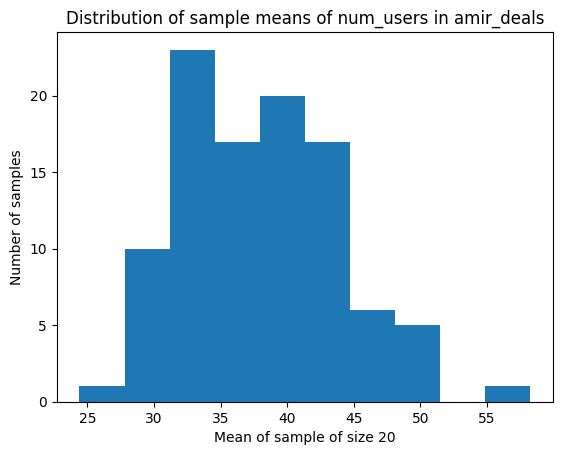

In [25]:

np.random.seed(104)
sample_means=[]
for i in range(100):
    sample_mean = np.random.choice(amir_deals["num_users"], size=20, replace=True).mean()
    sample_means.append(sample_mean)

sample_means = pd.Series(sample_means)

# Create a histogram of the sample means
plt.hist(sample_means)
plt.xlabel("Mean of sample of size 20")
plt.ylabel("Number of samples")
plt.title("Distribution of sample means of num_users in amir_deals")
plt.show()

In [27]:
world_happiness= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Second year first sem/DATA SCIENCE/W7 - Data Sets/world_happiness.csv")
world_happiness.head()

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [29]:
happiness_score= world_happiness["happiness_score"]
life_exp=world_happiness["life_exp"]

<Axes: xlabel='happiness_score', ylabel='life_exp'>

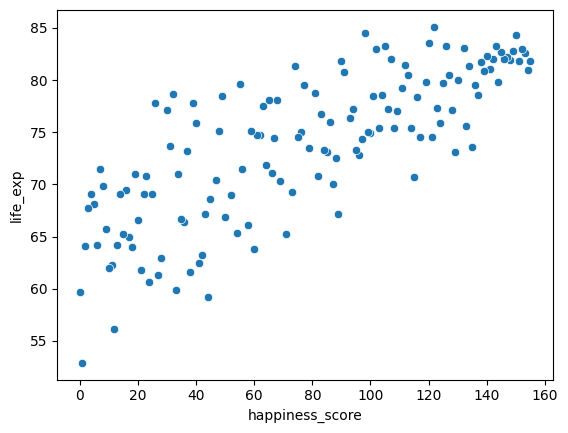

In [31]:
sns.scatterplot(x="happiness_score",y="life_exp",data=world_happiness)
plt.show()

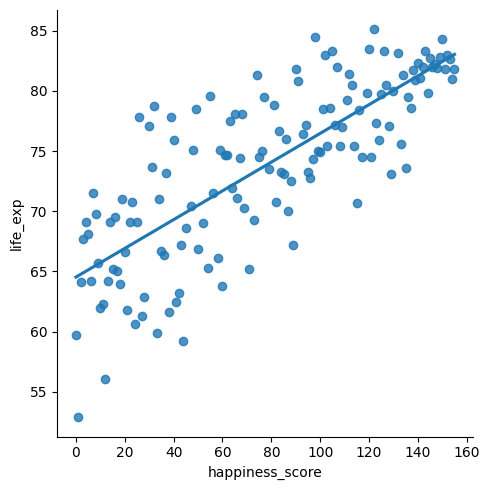

In [33]:
sns.lmplot(x="happiness_score",y="life_exp",data=world_happiness,ci=None)
plt.show()

In [37]:
cor=world_happiness["happiness_score"].corr(world_happiness["life_exp"])
print("Therefore third answer is correct: ",cor)

Therefore third answer is correct:  0.7802249053272062


cor value:  0.727973301222298


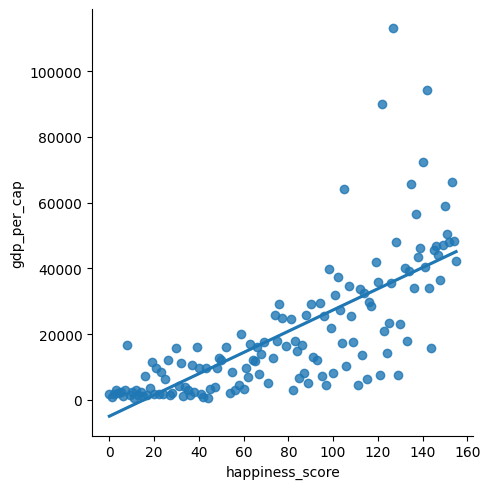

In [39]:
sns.lmplot(x="happiness_score",y="gdp_per_cap",data=world_happiness,ci=None)
print("cor value: ",world_happiness["happiness_score"].corr(world_happiness["gdp_per_cap"]))

cor value:  0.8043146004918289


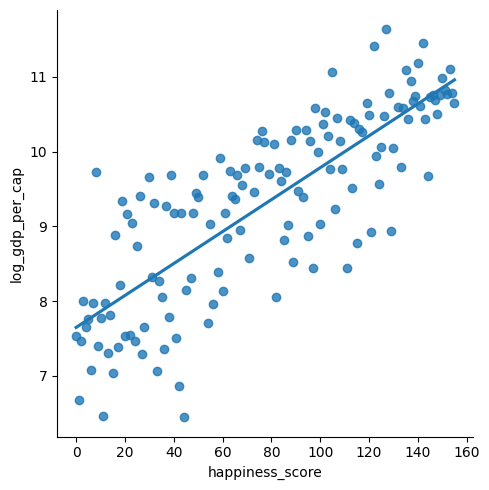

In [40]:

### use log when data are skrewed




world_happiness["log_gdp_per_cap"]=np.log(world_happiness["gdp_per_cap"])
sns.lmplot(x="happiness_score",y="log_gdp_per_cap",data=world_happiness,ci=None)
print("cor value: ",world_happiness["happiness_score"].corr(world_happiness["log_gdp_per_cap"]))